In [44]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [45]:
# import cleaned dataset
# reading the file
df = pd.read_csv("Algerian_forest_fire_cleaned_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [46]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

1. Train Test Split

In [47]:
df.drop(['day','month','year'], axis=1, inplace=True)


In [48]:
# Encoding Not fire as 0 and Fire as 1
df['Classes']= np.where(df['Classes']== 'not fire',0,1)

In [49]:
X = df.drop("FWI", axis=1) # except 'FWI' all the features are independent
y = df['FWI'] # FWI is the dependent feature

In [84]:
# seperating dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.24, random_state=0)
X_train.shape, X_test.shape

((185, 11), (59, 11))

In [85]:
y_train.shape, y_test.shape

((185,), (59,))

2. Feature selection

In [86]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.628819,-0.223464,-0.328599,0.671338,0.441871,0.325799,0.596567,0.413208,0.505263,0.254840
RH,-0.628819,1.000000,0.192566,0.233019,-0.644498,-0.369579,-0.153349,-0.682647,-0.299753,-0.414530,-0.444796
Ws,-0.223464,0.192566,1.000000,0.154420,-0.140074,0.052383,0.114171,0.064246,0.076869,-0.043252,-0.123498
Rain,-0.328599,0.233019,0.154420,1.000000,-0.536536,-0.291567,-0.296689,-0.339357,-0.300015,-0.370945,-0.039104
FFMC,0.671338,-0.644498,-0.140074,-0.536536,1.000000,0.612468,0.500119,0.736106,0.591980,0.773292,0.233491
DMC,0.441871,-0.369579,0.052383,-0.291567,0.612468,1.000000,0.872209,0.668367,0.982943,0.606139,0.165235
DC,0.325799,-0.153349,0.114171,-0.296689,0.500119,0.872209,1.000000,0.469762,0.945346,0.512169,-0.125380
ISI,0.596567,-0.682647,0.064246,-0.339357,0.736106,0.668367,0.469762,1.000000,0.613973,0.732831,0.296861
BUI,0.413208,-0.299753,0.076869,-0.300015,0.591980,0.982943,0.945346,0.613973,1.000000,0.591884,0.057544
Classes,0.505263,-0.414530,-0.043252,-0.370945,0.773292,0.606139,0.512169,0.732831,0.591884,1.000000,0.202965


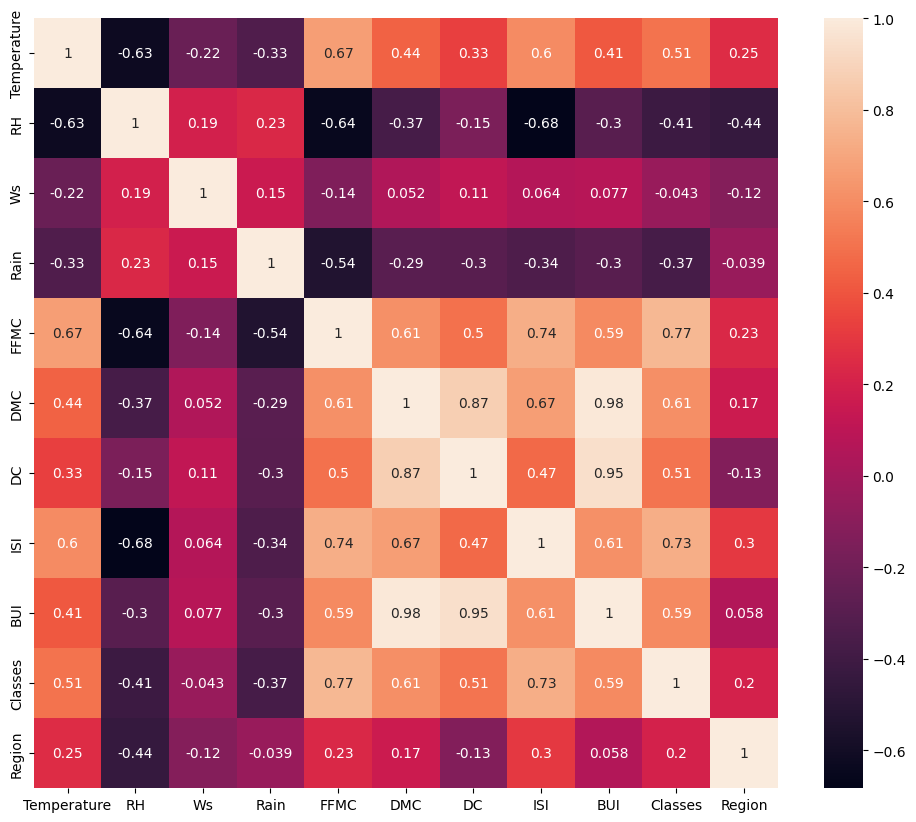

In [87]:
# using Pearson Correlation 
# Multicolinearity
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [88]:
# finding multicolinearity
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [89]:
# threshold domain expertise
# features which has correlation more than 0.85
corr_features = correlation(X_train, 0.85)
corr_features

{'BUI', 'DC'}

In [90]:
# drop features when correlation is more than 0.85
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape


((185, 9), (59, 9))

3. Feature Scaling or Standardization

In [91]:
# import SatndardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [92]:
X_train_scaled

array([[ 0.49809394, -0.65774207,  0.15333382, ..., -0.68853651,
        -1.15834889,  1.00542009],
       [-0.92833608,  0.96198882,  0.15333382, ..., -0.50462854,
         0.86329776, -0.99460913],
       [ 1.06866595, -0.72523086,  0.15333382, ...,  1.03560066,
         0.86329776,  1.00542009],
       ...,
       [-0.35776407, -0.45527571, -1.61958845, ..., -0.57359403,
        -1.15834889, -0.99460913],
       [-0.35776407,  0.48956731, -0.55583509, ..., -0.09083562,
         0.86329776, -0.99460913],
       [ 1.06866595, -2.1424954 ,  0.86250273, ...,  3.10456525,
         0.86329776,  1.00542009]])

Text(0.5, 1.0, 'X_train after scaling')

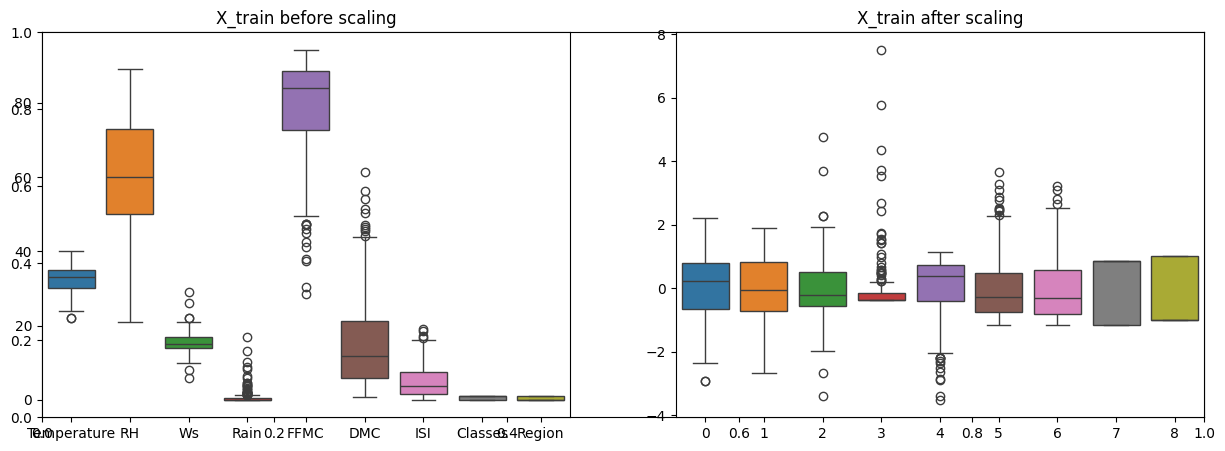

In [93]:
# Box plot to understand effect of standard scaler
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after scaling")

4.Model Selection

4.1 Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Linreg = LinearRegression()
Linreg.fit(X_train_scaled, y_train)
y_pred = Linreg.predict(X_test_scaled)
print(y_pred)

# checking accuracy
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Squared Error: ",mse)
print("Mean Absolute Error: ",mae)
print("R2 score: ",score)

[ 4.49229578  0.90125364 13.61838267  6.70261498  3.49163193 -0.41725936
  4.60475084 12.81330845  1.6599468  10.67900246  9.79177698  0.3277921
  7.62441178 13.71880024  0.53652981  0.94068371  5.12872614  9.86334328
 -0.41943874  0.29015591  9.94943882 -0.2611765  -0.42453392  1.41913691
 22.6754263  13.49294728  2.87435345  0.31778854  2.98800298  4.05911329
 10.39826083 -1.09065815  1.35949557  8.28097061  0.47301012  5.35815648
  7.99550889  0.35632816 13.08211251 -0.31720651  3.05405581  4.54338281
 14.38616685  9.54770625 27.53642126  1.35967464  6.3728055  -0.04091063
 11.79696596  7.35936955 20.29259575  1.25248734 -0.41144195 14.6546334
  2.78033213  0.75552603  0.15981203  1.36276243 -1.09858931]
Mean Squared Error:  0.8871772872919815
Mean Absolute Error:  0.6574366404959856
R2 score:  0.9787017147717776


4.2 Lasso Regression

In [97]:
# importing Lasso and metrics
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)

# checking accuracy
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean Absolute Error: ",mae)
print("R2 score: ",score)

Mean Absolute Error:  1.113559127737847
R2 score:  0.9486469829220876


5.3 Ridge Regression Model

In [99]:
# import ridge and mae ansd r2_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

#checking accuracy
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean absolute error: ",mae)
print("R2 score: ", score)

Mean absolute error:  0.6680231409029634
R2 score:  0.9784007465904181


4.4 Elasticnet Regression

In [100]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score

elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)

#checking accuracy
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean absolute error: ", mae)
print("R2 score: ", score)

Mean absolute error:  1.6184309753464228
R2 score:  0.8996199365929163


In [101]:
# pickling
import pickle
pickle.dump(scaler, open("scaler.pkl",'wb'))
pickle.dump(ridge, open("ridge.pkl",'wb'))